In [ ]:
"""
ned-result folder come from visually inspect individual object and wrote down the property for each one of them
(NED and SDSS database)
"""

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import cm
import matplotlib

import pandas as pd
import numpy as np
import csv
import sys

from astropy.io import ascii
# import mpld3
# from mpld3 import plugins, utils
import urllib2

#my own library for deg_hr, hr_deg
from ch_py import *

%matplotlib inline
#pylab.rcParams['figure.figsize'] = 8, 7

import seaborn as sns
sns.set(context='talk',style='ticks',font='serif',palette='muted',rc={"xtick.direction":"in","ytick.direction":"in"})

#mpld3.enable_notebook()
#mpld3.disable_notebook()

In [3]:
#function to remove all non-numbers characters into Nan
def func(x):
    try:
        return float(x)
    except ValueError:
        return -1.

<hr>

## NED Analysis

In [4]:
df = pd.read_csv('/Users/taweewat/Documents/xray_project/result/cut-05.csv',\
                    keep_default_na=False, na_values=[""])
print df.loc[0:100].shape, df.shape#.dropna().shape

(101, 52) (752, 52)


(array([ 586.,  157.,    6.,    3.]),
 array([  0,  10,  20,  30, 100]),
 <a list of 4 Patch objects>)

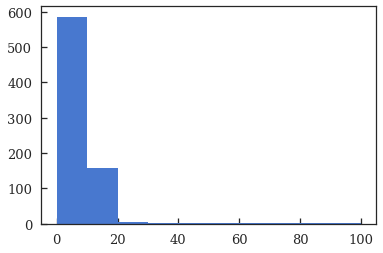

In [5]:
plt.hist(np.sqrt(((df['ra']+df['ra_radio'])/2-df['ra_m'])**2+((df['dec']+df['dec_radio'])/2-df['dec_m'])**2)*3600, bins=[0,10,20,30,100])

In [ ]:
#df.loc[df[df.isnull().any(axis=1)].index[0]]

In [6]:
df.head()

,ra,dec,xc,exc,hr1,ehr1,hr2,ehr2,dec_radio,df_radio,...,rad_f,erad_f,xray,mir,radio,exray,emir,eradio,RA,DEC
0,133.04916,76.45306,0.03920,0.011130,0.21,0.26,0.00,0.33,76.455056,6.5,...,1.906000e-24,3.361420e-26,-3.938519,1.181296,2.493392,0.133939,0.070364,0.053047,133.049330,76.454058
1,34.37958,73.82569,0.03880,0.008869,1.00,0.21,0.60,0.16,73.825639,68.1,...,2.271000e-23,3.521734e-25,-3.872174,1.345296,3.640287,0.116648,0.070748,0.061729,34.379123,73.825664
2,137.11916,72.27611,0.03119,0.010460,0.13,0.35,0.31,0.39,72.274694,9.5,...,3.178000e-24,4.912844e-26,-3.838990,1.457696,2.914223,0.164921,0.089388,0.077844,137.121913,72.275402
3,156.65541,70.54361,0.03453,0.012260,0.01,0.36,-0.79,0.78,70.545333,4.1,...,1.351000e-24,2.120280e-26,-3.864009,1.146896,2.473525,0.172692,0.092658,0.078258,156.653913,70.544472
4,114.08708,65.22320,0.02377,0.010900,0.69,0.35,0.93,1.13,65.220833,3.0,...,8.400000e-25,1.551425e-26,-3.978176,1.131696,2.315149,0.211597,0.111220,0.072322,114.088957,65.222017


## prepare value for NED search
URL: https://ned.ipac.caltech.edu/forms/nnd.html
seperation: 15"

In [7]:
#prepare value for NED search by creating list of RA and DEC sutiable for the search
print (df.loc[701:,['RA','DEC']]).to_csv(sep='\t', index=False)

RA	DEC
327.495801667	-18.9905527778
327.981373333	-30.4650972222
328.747855834	7.33076277778
330.167498334	-23.1241955556
330.280833334	5.07737333334
330.6826875	42.2759177778
331.67237	-21.3293305556
332.636935833	-55.1428861111
332.9605225	-37.1192061111
333.394884166	-63.4980577778
334.279158333	-30.5789883333
334.9359875	21.3487211111
335.309466666	-28.0722627778
335.7773125	-34.9285416667
336.409644167	21.3018216666
336.9815675	-43.5627627778
337.665415	-39.7135294445
340.079899167	-52.5312383333
340.258135833	27.5485438889
340.598529167	-60.742985
341.253854166	-49.5276794445
341.642128333	-28.89725
341.809730833	2.06908111111
342.075496667	-10.2644155555
342.4987375	-33.2557211111
342.8300725	-38.4523627778
343.491043333	16.1483883333
343.5400675	24.7564588889
343.859003333	30.4209994444
344.108364166	-65.5563216667
345.7657675	-18.6921366667
345.927495	-68.126725
346.1536125	37.0852505556
346.725685833	-34.6529033334
346.824449167	-42.6035138889
347.41858	-36.5431661111
347.540

In [8]:
# dff=pd.read_csv('/Users/taweewat/Documents/xray_project/candidate_757.txt', keep_default_na=True, sep="|",\
#                 skiprows=0,names=headers)

headers=['1','2','ra_dec','sep','3','name','ra_h','dec_h','type','redshift','4','5']
dff=pd.read_csv('/Users/taweewat/Documents/xray_project/candidate_752_v5.txt', keep_default_na=True, sep="|",\
                skiprows=0,names=headers)
dff=dff[4:]
print dff.shape
df2=dff.loc[dff['ra_dec']!='                              ']
# df2.duplicated('ra_dec')
print df2.shape
# df2.tail()

(2399, 12)
(752, 12)


In [ ]:
dff

In [ ]:
# headers=['1','2','ra_dec','sep','3','name','ra_h','dec_h','type','redshift','4','5']
# dff=pd.read_csv('/Users/taweewat/Documents/xray_project/candidate_757.txt', keep_default_na=True, sep="|",\                
#                 skiprows=0,names=headers)
#dff=dff[4:]

# dff=pd.read_csv('/Users/taweewat/Documents/xray_project/candidates.txt', keep_default_na=True, sep="|",\
#                 skiprows=0,names=headers)
# dff=dff[2:]
# dff=dff.loc[:,['ra_dec','sep','name','type','redshift']]


dff['ra']=[i.strip().split(' ')[0] for i in dff['ra_dec'].values]
dff['dec']=[i.strip().split(' ')[-1] for i in dff['ra_dec'].values]
dff['redshift']=[i.strip() for i in dff['redshift'].values]


redshift_a=np.zeros(df.shape[0])-1
sep_a=np.zeros(df.shape[0])-1
type_a=["" for x in range(df.shape[0])]

i_df=-1
for index, row in dff.iterrows():
    if row['ra']!='':
        i_df+=1
        if row['redshift']!='':
            redshift_a[i_df]=row['redshift']        
            sep_a[i_df]=row['sep']
            type_a[i_df]=row['type']
    elif row['ra']=='':
        if row['redshift']!='':
            if redshift_a[i_df]==-1:
                redshift_a[i_df]=row['redshift']
                sep_a[i_df]=row['sep']
                type_a[i_df]=row['type']

In [ ]:
df[(df['ra']>193) & (df['ra']<194)]

In [ ]:
df['redshift']=redshift_a
df.loc[:,'sep']=sep_a
df.loc[:,'type']=type_a
df.head()

In [ ]:
plt.hist(df.loc[df['sep']!=-1,'sep']);

In [ ]:
len(df['RA'])

## check whether there is SDSS data in the archive

In [ ]:
x=urllib2.urlopen("http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=101.25618917&dec=60.41442889&scale=0.20&width=400&height=400&opt=OG")
empty_file=x.read()

scale=0.2
width=400
height=400

sdss=[]
for i in range(len(df['RA'])):
    RA=df['RA'][i]
    DEC=df['DEC'][i]
    url = ("http://skyservice.pha.jhu.edu/DR12/ImgCutout/"
           "getjpeg.aspx?ra=%.8f&dec=%.8f&scale=%.2f&width=%i&height=%i&opt=OG"%(RA, DEC, scale, width, height))
    print url
    page=urllib2.urlopen(url)
    img=page.read()
    if img==empty_file:
        print 'empty'
        sdss.append('no')
    else:
        print 'image'
        sdss.append('yes')

In [ ]:
len(sdss)

In [ ]:
df.loc[:,'SDSS']=sdss

In [ ]:
def reject_redshift(x):
    if x==-1 or (x>=0.1 and x<=0.7):
        return 'not_reject'
    else:
        return 'reject'
     
def follow(row):
    if row['SDSS']=='no' and row['reject']=='not_reject':
        return 'follow'
    if row['SDSS']=='yes' and row['reject']=='not_reject':
        return 'followed'
    if row['SDSS']=='no' and row['reject']=='reject':
        return 'outSD/outside'
    if row['SDSS']=='yes' and row['reject']=='reject':
        return 'inSD/outside'

df.loc[:,'reject']=df['redshift'].apply(reject_redshift)
df.loc[:,'followup']=df.apply(follow, axis=1)
df.loc[:,'RA0']=df.loc[:,'RA']
df.loc[:,'DEC0']=df.loc[:,'DEC']

In [ ]:
df['reject'].value_counts()

In [ ]:
print df['followup'].value_counts()
print df['SDSS'].value_counts()

In [ ]:
## save the new table
df.to_csv('/Users/taweewat/Documents/xray_project/ned-result/final_cut5.csv', index=False)

In [ ]:
#df[(df.redshift>0.7) & (df.redshift<0.8)]

# Quick analysis on specific object (start here for plot)

In [39]:
dff=pd.read_csv('/Users/taweewat/Documents/xray_project/ned-result/final_cut5.csv')
dff.columns

Index([u'ra', u'dec', u'xc', u'exc', u'hr1', u'ehr1', u'hr2', u'ehr2',
       u'dec_radio', u'df_radio', u'f_radio', u'ra_radio', u'f_radio_n',
       u'flag', u'dist', u'ra_w', u'dec_w', u'w1', u'ew1', u'dist_w', u'w2',
       u'ew2', u'w3', u'ew3', u'w4', u'ew4', u'ra_m', u'dec_m', u'j_m',
       u'ej_m', u'dist_m', u'h_m', u'eh_m', u'k_m', u'ek_m', u'df_radio_n',
       u'wi_f', u'ewi_f', u'2m_f', u'e2m_f', u'x_f', u'ex_f', u'rad_f',
       u'erad_f', u'xray', u'mir', u'radio', u'exray', u'emir', u'eradio',
       u'RA', u'DEC', u'redshift', u'sep', u'type', u'SDSS', u'reject',
       u'followup', u'RA0', u'DEC0'],
      dtype='object')

In [31]:
phoe=(356.18307,-42.720204)
abell=(210.258631,2.878468)
ngc=(49.950416,41.51166)
dff.shape

(752, 60)

In [11]:
target_15=dff.loc[(((dff.loc[:,'RA']-261.8475)**2+(dff.loc[:,'DEC']-55.1813888889)**2)**0.5).idxmin(),:]
#target_15;

In [32]:
dff.loc[np.argmin(np.abs((dff['RA0']-abell[0]))+np.abs((dff['DEC0']-abell[1])))].head()

ra     210.259
dec    2.88042
xc       0.713
exc    0.04587
hr1       0.46
Name: 603, dtype: object

 0.01311 -0.477 9.976 2.1e-26


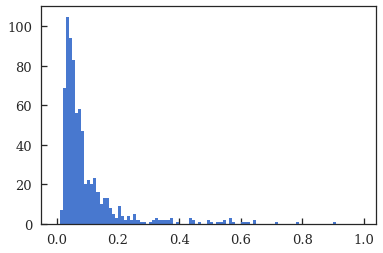

In [44]:
plt.hist(dff.xc,bins=np.arange(0,1,0.01));
print np.min(dff.xc), np.min(dff.w4), np.min(dff.k_m), np.min(dff.rad_f)

## Combine two tables for a new total table

In [14]:
cut=dff
print cut.shape
cut.head()
cut['followup'].value_counts()

(752, 60)


follow           303
followed         247
inSD/outside     124
outSD/outside     78
Name: followup, dtype: int64

## Plotting the results

In [ ]:
#plt.scatter(cut['redshift'].values,cut['xray'].values)
#mpld3.disable_notebook()
bins = np.linspace(-1.5, 3.5, 40)
fig, ax = plt.subplots(1, 2, figsize=(15,6))
q1=cut[cut['followup']=='follow']['redshift'].dropna().values
q2=cut[cut['followup']=='followed']['redshift'].dropna().values
q3=cut[cut['followup']=='outSD/outside']['redshift'].dropna().values
q4=cut[cut['followup']=='inSD/outside']['redshift'].dropna().values

ax[0].hist([q1,q2,q3,q4], bins=bins, stacked=True, normed = True, alpha=0.5, color=['blue','green','grey','red'],\
          label=['SD:no/z:in,no','SD:yes/z:in,no','SD:no/z:out','SD:yes/z:out'])
ax[0].set_xlabel(r'$z$', size=20.)
ax[0].legend(loc='best')

a1=cut.loc[(cut['redshift']>-0.5) & (cut['followup']=='follow')].redshift.dropna().values
a2=cut.loc[(cut['redshift']>-0.5) & (cut['followup']=='followed')].redshift.dropna().values
a3=cut.loc[(cut['redshift']>-0.5) & (cut['followup']=='outSD/outside')].redshift.dropna().values
a4=cut.loc[(cut['redshift']>-0.5) & (cut['followup']=='inSD/outside')].redshift.dropna().values
ax[1].hist([a1,a2,a3,a4], bins=bins, stacked=True, normed = True, alpha=0.5, color=['blue','green','grey','red'],\
          label=['SD:no/z:in,no','SD:yes/z:in,no','SD:no/z:out','SD:yes/z:out'])
ax[1].set_xlabel(r'Redshift (z)', size=20.)

ax[1].legend(loc='best')

plt.tight_layout()


In [16]:
#abell2=final.loc[(((final.loc[:,'RA']-210.258631)**2+(final.loc[:,'DEC']-2.878468)**2)**0.5).idxmin(),:]
ngc=cut.loc[(((cut.loc[:,'RA']-49.950416)**2+(cut.loc[:,'DEC']-41.51166)**2)**0.5).idxmin(),:]
pheo2=cut.loc[(((cut.loc[:,'RA']-356.18307)**2+(cut.loc[:,'DEC']+42.720204)**2)**0.5).idxmin(),:]
target=cut.loc[(((cut.loc[:,'RA']-209.02268)**2+(cut.loc[:,'DEC']+34.35293)**2)**0.5).idxmin(),:]

ngc_i=(((cut.loc[:,'RA']-49.950416)**2+(cut.loc[:,'DEC']-41.51166)**2)**0.5).idxmin()
phoe_i=(((cut.loc[:,'RA']-356.18307)**2+(cut.loc[:,'DEC']+42.720204)**2)**0.5).idxmin()
#target_i=(((cut.loc[:,'RA']-209.02268)**2+(cut.loc[:,'DEC']+34.35293)**2)**0.5).idxmin()

abell_i=(((cut.loc[:,'RA']-210.258631)**2+(cut.loc[:,'DEC']-2.878468)**2)**0.5).idxmin()
pks_i=(((cut.loc[:,'RA']-209.02208)**2+(cut.loc[:,'DEC']+34.3527777)**2)**0.5).idxmin()
rxj_i=(((cut.loc[:,'RA']-261.8475)**2+(cut.loc[:,'DEC']-55.1813889)**2)**0.5).idxmin()

print ngc_i, phoe_i, abell_i, pks_i, rxj_i

397 749 603 599 649


In [17]:
print cut.loc[ngc_i][['ra','dec']]
print cut.loc[phoe_i][['ra','dec']]
print cut.loc[abell_i][['ra','dec']]
print cut.loc[pks_i][['ra','dec']]
print cut.loc[rxj_i][['ra','dec']]

ra     49.9475
dec    41.5144
Name: 397, dtype: object
ra     356.184
dec   -42.7221
Name: 749, dtype: object
ra     210.259
dec    2.88042
Name: 603, dtype: object
ra     209.021
dec   -34.3457
Name: 599, dtype: object
ra     261.842
dec    55.1804
Name: 649, dtype: object


In [ ]:
#mpld3.enable_notebook()
#mpld3.disable_notebook()

fig, ax = plt.subplots(1, 3, figsize=(15,7))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

point=ax[0].scatter(cut['mir'],cut['xray'],alpha=0.5,c='lightgreen',label='Cut')
#ax[0].scatter(abell2['mir'],abell2['xray'],alpha=1.0,c='red',label='Abell',s=40.0)
ax[0].scatter(ngc['mir'],ngc['xray'],alpha=1.0,c='yellow',label='NGC 1275',s=40.0)
ax[0].scatter(pheo2['mir'],pheo2['xray'],alpha=1.0,c='orange',label='Pheonix',s=40.0)
ax[0].scatter(target['mir'],target['xray'],alpha=1.0,c='pink',label='target',s=40.0)
ax[0].set_xlabel('MIR/NIR')
ax[0].set_ylabel('XRay/NIR')
ax[0].legend(loc='best')

point=ax[1].scatter(ngc['mir'],ngc['radio'],alpha=1.0,c='yellow',label='NGC 1275',s=40.0)
ax[1].scatter(pheo2['mir'],pheo2['radio'],alpha=1.0,c='orange',label='Pheonix',s=40.0)
ax[1].scatter(target['mir'],target['radio'],alpha=1.0,c='pink',label='target',s=40.0)
#ax[1].scatter(abell2['mir'],abell2['radio'],alpha=1.0,c='red',label='Abell',s=40.0)
ax[1].scatter(cut['mir'],cut['radio'],alpha=0.5,c='lightgreen',label='Cut')
ax[1].set_xlabel('MIR/NIR')
ax[1].set_ylabel('Radio/NIR')

point=ax[2].scatter(cut['xray'],cut['radio'],alpha=0.5,c='lightgreen',label='Cut')
#ax[2].scatter(abell2['xray'],abell2['radio'],alpha=1.0,c='red',label='Abell',s=60.0)
ax[2].scatter(ngc['xray'],ngc['radio'],alpha=1.0,c='yellow',label='NGC 1275',s=60.0)
ax[2].scatter(pheo2['xray'],pheo2['radio'],alpha=1.0,c='orange',label='Pheonix',s=60.0)
ax[2].scatter(target['xray'],target['radio'],alpha=1.0,c='pink',label='target',s=60.0)
ax[2].set_xlabel('XRay/NIR')
ax[2].set_ylabel('Radio/NIR')
#ax[2].axis([-4.5,-2.5,0,4.5])
plt.tight_layout()

#plugins.connect(fig, plugins.LinkedBrush(point))

In [19]:
#function for SDSS column
def type2v(x):
    if x=='n':
        return 1
    elif x=='rg' or x=='rgs':
        return 2
    elif x=='q' or x=='qs' or x=='qg' or x=='qgs':
        return 3
    elif x=='s' or x=='sp':
        return 4
    elif x=='fail':
        return 5
    
def type_redshift(x):
    if x=='hz':
        return 1
    elif x=='n':
        return 2
    elif x=='lz':
        return 3
    
def cri_redshift(x):
#     if x==-1 or (x>=0.1 and x<=0.8):
#         return 'not_reject'
    if 0.<x<0.1:
        return 'lz'
    #only use z>0.7
    elif x>0.7:
        return 'hz'
    else:
        return 'n'

In [20]:
#cut["SDSSc"]=cut["SDSS"].apply(type2v)
cut["rejectc"]=cut["redshift"].apply(cri_redshift)
cut.loc[phoe_i]['xray']
print cut.columns
cut.shape

Index([u'ra', u'dec', u'xc', u'exc', u'hr1', u'ehr1', u'hr2', u'ehr2',
       u'dec_radio', u'df_radio', u'f_radio', u'ra_radio', u'f_radio_n',
       u'flag', u'dist', u'ra_w', u'dec_w', u'w1', u'ew1', u'dist_w', u'w2',
       u'ew2', u'w3', u'ew3', u'w4', u'ew4', u'ra_m', u'dec_m', u'j_m',
       u'ej_m', u'dist_m', u'h_m', u'eh_m', u'k_m', u'ek_m', u'df_radio_n',
       u'wi_f', u'ewi_f', u'2m_f', u'e2m_f', u'x_f', u'ex_f', u'rad_f',
       u'erad_f', u'xray', u'mir', u'radio', u'exray', u'emir', u'eradio',
       u'RA', u'DEC', u'redshift', u'sep', u'type', u'SDSS', u'reject',
       u'followup', u'RA0', u'DEC0', u'rejectc'],
      dtype='object')


(752, 61)

In [21]:
cut.head()

,ra,dec,xc,exc,hr1,ehr1,hr2,ehr2,dec_radio,df_radio,...,DEC,redshift,sep,type,SDSS,reject,followup,RA0,DEC0,rejectc
0,133.04916,76.45306,0.03920,0.011130,0.21,0.26,0.00,0.33,76.455056,6.5,...,76.454058,1.127,3.6,G,no,reject,outSD/outside,133.049330,76.454058,hz
1,34.37958,73.82569,0.03880,0.008869,1.00,0.21,0.60,0.16,73.825639,68.1,...,73.825664,2.367,0.8,QSO,yes,reject,inSD/outside,34.379123,73.825664,hz
2,137.11916,72.27611,0.03119,0.010460,0.13,0.35,0.31,0.39,72.274694,9.5,...,72.275402,-1.000,-1.0,NaN,no,not_reject,follow,137.121913,72.275402,n
3,156.65541,70.54361,0.03453,0.012260,0.01,0.36,-0.79,0.78,70.545333,4.1,...,70.544472,-1.000,-1.0,NaN,no,not_reject,follow,156.653913,70.544472,n
4,114.08708,65.22320,0.02377,0.010900,0.69,0.35,0.93,1.13,65.220833,3.0,...,65.222017,3.035,7.3,QSO,yes,reject,inSD/outside,114.088957,65.222017,hz


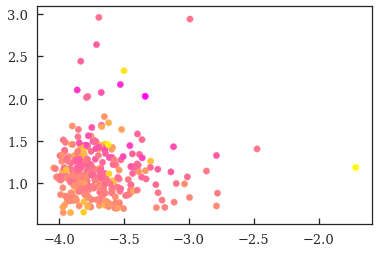

In [22]:
cut["col-dist-phoe"]=np.sqrt((cut["xray"]-cut.loc[phoe_i]['xray'])**2+(cut["mir"]-cut.loc[phoe_i]['mir'])**2+(cut["radio"]-cut.loc[phoe_i]['radio'])**2)

plt.scatter(cut[cut.followup=='follow']["xray"],cut[cut.followup=='follow']["mir"],alpha=1.,c=cut[cut.followup=='follow']["col-dist-phoe"],label='dot',s=40.,cmap='spring')

In [23]:
dff=cut[cut.followup=='follow'].sort_values("col-dist-phoe")[["RA","DEC","type","col-dist-phoe",'redshift','xray','mir','radio']]
#dff
#dff.to_csv("/Users/taweewat/Documents/xray_project/result/sorted_candidate.csv")
dff2=cut.sort_values("col-dist-phoe")[["RA","DEC","type","col-dist-phoe",'redshift','xray','mir','radio']]
dff2.head()
#dff2.to_csv("/Users/taweewat/Documents/xray_project/result/sorted_candidate_all.csv")

,RA,DEC,type,col-dist-phoe,redshift,xray,mir,radio
749,356.183104,-42.721290,G,0.000000,0.597320,-3.337123,2.028896,1.696004
408,63.850003,-23.375820,G,0.482923,0.616300,-3.673911,1.684496,1.661692
442,109.286231,22.440459,NaN,0.485024,-1.000000,-3.529095,2.167696,1.272768
596,208.423646,43.182137,QSO,0.524457,1.115869,-3.620852,1.592896,1.629241
197,32.147314,-17.661653,G,0.565935,0.129000,-3.861813,2.102896,1.894766


In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

colors=['lightgreen','red','lightblue','brown','yellow','orange','pink']
labels=['No','gal','qso','near','NGC 1275','Phoenix','target']
indi=[ngc_i,phoe_i,target_i]

def plot_s(x,y,n,m,other=False):
    for i in range(1,8):
        if i==1 & other==True:
            pass
        elif i<5:
            ax[n,m].scatter(cut[cut.SDSSc==i][x],cut[cut.SDSSc==i][y],alpha=0.5,c=colors[i-1],label=labels[i-1],\
                            s=60.)
        elif i>=5:
            ax[n,m].scatter(cut.loc[indi[i-5],x],cut.loc[indi[i-5],y],alpha=1.,c=colors[i-1],label=labels[i-1],\
                            s=100,marker='s')
    ax[n,m].legend(loc='best')
    ax[n,m].set_xlabel(x+'/nir')
    ax[n,m].set_ylabel(y+'/nir')
    return 

point=plot_s('xray','radio',0,0)           
plot_s('mir','radio',0,1)           
plot_s('mir','xray',0,2)
plot_s('xray','radio',1,0,other=True)   
plot_s('mir','radio',1,1,other=True)           
plot_s('mir','xray',1,2,other=True)

ax[0,0].axis([-4.2,-1.5,0,5])
ax[1,0].axis([-4.2,-1.5,0,5])
ax[0,2].axis([0.5,4.5,-4.2,-1.5])
ax[1,2].axis([0.5,4.5,-4.2,-1.5])


plt.tight_layout()
plugins.connect(fig, plugins.LinkedBrush(point))

In [ ]:
cut.head()

### Main one for plotting the main figure

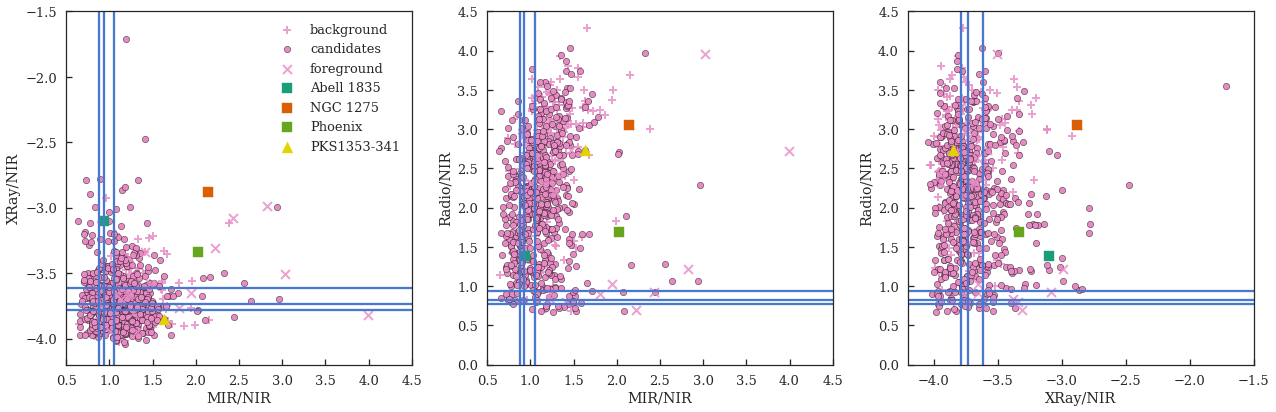

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

colors=['#e78ac3','#e78ac3','#e78ac3','#1b9e77','#d95f02','#66a61e','#e3d400']#,'#4868db']
labels=['background','candidates','foreground','Abell 1835','NGC 1275','Phoenix','PKS1353-341']#,'RXJ1727.3+5510']
markers=['+','o','x']
#indi=[ngc_i,phoe_i,target_i]
indi=[abell_i,ngc_i,phoe_i,pks_i]#,rxj_i]
redshift_type=['hz','n','lz']

def plot_s(x,y,n,other=False):
    for i in range(1,9):
        if other==True:
            pass
        elif i==1 or i==3:
            ax[n].scatter(cut[cut.rejectc==redshift_type[i-1]][x],cut[cut.rejectc==redshift_type[i-1]][y],alpha=0.8,\
                          c=colors[i-1],label=labels[i-1],s=80.,linewidth=2,marker=markers[i-1])
        elif i==2:
            pass
            ax[n].scatter(cut[cut.rejectc==redshift_type[i-1]][x],cut[cut.rejectc==redshift_type[i-1]][y],alpha=1.,\
                          c=colors[i-1],label=labels[i-1],s=40.,marker=markers[i-1],edgecolor='k')
        elif i>=4 and i<7:
            ax[n].scatter(cut.loc[indi[i-4],x],cut.loc[indi[i-4],y],alpha=1.,c=colors[i-1],label=labels[i-1],\
                            s=100,marker='s')
        elif i==7:
            ax[n].scatter(cut.loc[indi[i-4],x],cut.loc[indi[i-4],y],alpha=1.,c=colors[i-1],label=labels[i-1],\
                            s=120,marker='^')
    #ax[n].legend(loc='best')
    ax[n].set_xlabel(x+'/NIR')
    ax[n].set_ylabel(y+'/NIR')
    return 

point=plot_s('xray','radio',2)           
plot_s('mir','radio',1)           
plot_s('mir','xray',0)
#plot_s('xray','radio',1,0,other=True)   
#plot_s('mir','radio',1,1,other=True)           
#plot_s('mir','xray',1,2,other=True)

ax[0].legend(loc='best')
ax[0].set_xlabel('MIR/NIR')
ax[1].set_xlabel('MIR/NIR')
ax[2].set_xlabel('XRay/NIR')
ax[0].set_ylabel('XRay/NIR')
ax[1].set_ylabel('Radio/NIR')
ax[2].set_ylabel('Radio/NIR')

ax[2].axis([-4.2,-1.5,0,4.5])
#ax[1,0].axis([-4.2,-1.5,0,5])
ax[0].axis([0.5,4.5,-4.2,-1.5])
ax[1].axis([0.5,4.5,0,4.5])
#ax[1,2].axis([0.5,4.5,-4.2,-1.5])

ax[0].axvline(cut.loc[phoe_i,'mir']-np.log10(1.9*5))
ax[0].axvline(cut.loc[phoe_i,'mir']-np.log10(2.5*5))
ax[0].axvline(cut.loc[phoe_i,'mir']-np.log10(2.8*5))
ax[0].axhline(cut.loc[phoe_i,'xray']-np.log10(1.9))
ax[0].axhline(cut.loc[phoe_i,'xray']-np.log10(2.5))
ax[0].axhline(cut.loc[phoe_i,'xray']-np.log10(2.8))

ax[1].axvline(cut.loc[phoe_i,'mir']-np.log10(1.9*5))
ax[1].axvline(cut.loc[phoe_i,'mir']-np.log10(2.5*5))
ax[1].axvline(cut.loc[phoe_i,'mir']-np.log10(2.8*5))
ax[1].axhline(cut.loc[phoe_i,'radio']-np.log10(1.9*3))
ax[1].axhline(cut.loc[phoe_i,'radio']-np.log10(2.5*3))
ax[1].axhline(cut.loc[phoe_i,'radio']-np.log10(2.8*3))

ax[2].axvline(cut.loc[phoe_i,'xray']-np.log10(1.9))
ax[2].axvline(cut.loc[phoe_i,'xray']-np.log10(2.5))
ax[2].axvline(cut.loc[phoe_i,'xray']-np.log10(2.8))
ax[2].axhline(cut.loc[phoe_i,'radio']-np.log10(1.9*3))
ax[2].axhline(cut.loc[phoe_i,'radio']-np.log10(2.5*3))
ax[2].axhline(cut.loc[phoe_i,'radio']-np.log10(2.8*3))

plt.tight_layout()
#plugins.connect(fig, plugins.LinkedBrush(point))

#plt.savefig('/Users/taweewat/Documents/chandra/figure/560_object_1.pdf', bbox_inches='tight')

In [ ]:
phoe_i

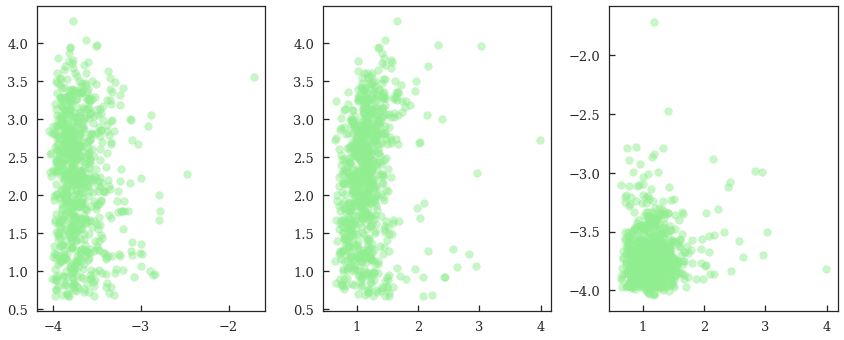

In [27]:
#mpld3.enable_notebook()
# mpld3.disable_notebook()

fig, ax = plt.subplots(1, 3, figsize=(12,5))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.1, wspace=0.1)

point=ax[0].scatter(cut['xray'],cut['radio'],alpha=0.5,c='lightgreen',label='No',s=60.)
point=ax[1].scatter(cut['mir'],cut['radio'],alpha=0.5,c='lightgreen',label='No',s=60.)
point=ax[2].scatter(cut['mir'],cut['xray'],alpha=0.5,c='lightgreen',label='No',s=60.)

plt.tight_layout()

# labels = ['point {0}'.format(i + 1) for i in range(len(cut['RA']))]
# tooltip = mpld3.plugins.PointLabelTooltip(point, labels=labels)
# plugins.connect(fig, tooltip)
#plugins.connect(fig, plugins.LinkedBrush(point))

In [28]:
# mpld3.disable_notebook()
import astropy.coordinates as coord
import astropy.units as u

x=final[final['SDSS']!='n']
#x=final

ra = coord.Angle(x['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(x['DEC']*u.degree)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian,c='lightgreen',alpha=0.7,s=50)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

NameError: name 'final' is not defined

In [ ]:
x = cut['followup'].value_counts()
plt.bar(range(len(x)), x.values, align='center')
plt.xticks(range(len(x)), x.index.values, size='large')

In [ ]:
fig = plt.subplots(figsize=(6,6))
x = cut['followup'].value_counts()
head=['To Follow up','SDSS','Foreground/\nBackground']
value=[x.values[0],x.values[1],x.values[2]+x.values[3]]
print value

plt.bar(range(len(head)), value, align='center', color=['#e78ac3','#1b9e77','#7570b3'])
plt.xticks(range(len(head)), head, size='medium')
for i in range(len(head)):
    plt.text(i-0.15,value[i]+10,value[i],color='#DF763B',family='sans-serif',weight='bold')

#plt.savefig('/Users/taweewat/Dropbox/Documents/MIT/Poster/bar.png', bbox_inches='tight')


#plt.savefig('/Users/taweewat/Documents/chandra/figure/barchart.pdf', bbox_inches='tight')

In [ ]:
dfc=cut[cut['followup']=='follow']

plt.hist(np.sqrt((dfc['RA']-dfc['ra_w'])**2+(dfc['DEC']-dfc['dec_w'])**2)*3600, bins=[0,10,20,30,40])

In [ ]:
np.sum(cut['redshift']!=-1.)

In [ ]:
cut